In [175]:
import pandas as pd
import numpy as np
import ast
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

Lo que voy a buscar en este EDA es encontrar cuales son las condiciones de peliculas que mas influyen en la popularidad. Esto se aplica para reducir el dataset y poder generar un modelo de Machine Learning basado en la popularidad general de las peliculas

In [176]:
credits = pd.read_csv("./Datasets/credits.csv")
df = pd.read_csv("./Datasets/movies_dataset.csv")

In [177]:
df["belongs_to_collection"].fillna("None",inplace=True)

In [178]:
def nombre_actores(fila): 
    try:                  
        a = ast.literal_eval(fila["cast"]) 
        if len(a) == 0: 
            return None 
        nombre_actor = [actor.get("name") for actor in a] 
        return ", ".join(nombre_actor) 
    except Exception: 
        return None 

def nombre_director(fila):
    try:
        directores = ast.literal_eval(fila["crew"])
        directores_nombre = [e["name"] for e in directores if e["job"] == "Director"]
        return ", ".join(directores_nombre)
    except (SyntaxError, ValueError):
        return None

def colleciones(fila):
    try:    
        bc = ast.literal_eval(fila["belongs_to_collection"])
        collection = bc.get("name")
        return collection
    except Exception:
        return None
    
def generos(fila): 
    try:
        g = ast.literal_eval(fila["genres"])
        if len(g) == 0:
            return None 
        nombre_genero = [genero.get("name") for genero in g]
        return ", ".join(nombre_genero)
    except Exception:
        return None
    
def idioma(fila): 
    try:
        i = ast.literal_eval(fila["spoken_languages"])
        if len(i) == 0:
            return None 
        nombre_idioma = [idioma.get("name") for idioma in i]
        return ", ".join(nombre_idioma)
    except Exception:
        return None
    
def compania(fila): 
    try:
        c = ast.literal_eval(fila["production_companies"])
        if len(c) == 0:
            return None 
        companias = [compania.get("name") for compania in c]
        return ", ".join(companias)
    except Exception:
        return None
    
def pais_produccion(fila): 
    try:
        pc = ast.literal_eval(fila["production_countries"])
        if len(pc) == 0:
            return None 
        paises = [pais.get("name") for pais in pc]
        return ", ".join(paises)
    except Exception:
        return None

In [179]:
credits["actores"] = credits.apply(nombre_actores, axis=1)
credits["director"] = credits.apply(nombre_director, axis=1)
df["collecion"] = df.apply(colleciones, axis=1)
df["generos"] = df.apply(generos, axis=1)
df["idioma"] = df.apply(idioma, axis=1)
df["compania_productora"] = df.apply(compania, axis=1)
df["pais_produccion"] = df.apply(pais_produccion, axis=1)

In [180]:
credits.drop(columns="cast",inplace=True)
credits.drop(columns="crew",inplace=True)
df.drop(columns="belongs_to_collection",inplace=True)
df.drop(columns="genres",inplace=True)
df.drop(columns="spoken_languages",inplace=True)
df.drop(columns="production_companies",inplace=True)
df.drop(columns="production_countries",inplace=True)

In [181]:
print(df.info())
print(credits.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   adult                45466 non-null  object 
 1   budget               45466 non-null  object 
 2   homepage             7782 non-null   object 
 3   id                   45466 non-null  object 
 4   imdb_id              45449 non-null  object 
 5   original_language    45455 non-null  object 
 6   original_title       45466 non-null  object 
 7   overview             44512 non-null  object 
 8   popularity           45461 non-null  object 
 9   poster_path          45080 non-null  object 
 10  release_date         45379 non-null  object 
 11  revenue              45460 non-null  float64
 12  runtime              45203 non-null  float64
 13  status               45379 non-null  object 
 14  tagline              20412 non-null  object 
 15  title                45460 non-null 

In [182]:
df.drop(19730,inplace=True)
df.drop(29503,inplace=True)
df.drop(35587,inplace=True)

In [183]:
df["budget"] = df["budget"].astype("Int64")
df["id"] = df["id"].astype("Int64")
df["popularity"] = df["popularity"].astype("float64")
df["vote_average"] = df["vote_average"].astype("float64")
df["vote_count"] = df["vote_count"].astype("Int64")

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   adult                45463 non-null  object 
 1   budget               45463 non-null  Int64  
 2   homepage             7779 non-null   object 
 3   id                   45463 non-null  Int64  
 4   imdb_id              45446 non-null  object 
 5   original_language    45452 non-null  object 
 6   original_title       45463 non-null  object 
 7   overview             44509 non-null  object 
 8   popularity           45460 non-null  float64
 9   poster_path          45077 non-null  object 
 10  release_date         45376 non-null  object 
 11  revenue              45460 non-null  float64
 12  runtime              45203 non-null  float64
 13  status               45379 non-null  object 
 14  tagline              20412 non-null  object 
 15  title                45460 non-null  obje

In [185]:
df["popularity"].fillna(df["popularity"].mean(),inplace=True)
df["revenue"].fillna(df["revenue"].mean(),inplace=True)
df["runtime"].fillna(df["runtime"].mean(),inplace=True)
df["vote_average"].fillna(df["vote_average"].mean(),inplace=True)
df["vote_count"].fillna(df["vote_count"].mode(),inplace=True)

In [186]:
df["release_date"] = pd.to_datetime(df["release_date"],format="%Y-%M-%d",errors="coerce")

In [187]:
df.drop(columns=["adult","homepage","imdb_id","original_language","original_title","poster_path","status"],inplace=True)

In [188]:
df = df.join(credits.set_index('id'), on='id')
df.reset_index(inplace=True)
df.drop(columns="index",inplace=True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45539 entries, 0 to 45538
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget               45539 non-null  Int64         
 1   id                   45539 non-null  Int64         
 2   overview             44585 non-null  object        
 3   popularity           45539 non-null  float64       
 4   release_date         45452 non-null  datetime64[ns]
 5   revenue              45539 non-null  float64       
 6   runtime              45539 non-null  float64       
 7   tagline              20439 non-null  object        
 8   title                45536 non-null  object        
 9   video                45536 non-null  object        
 10  vote_average         45539 non-null  float64       
 11  vote_count           45536 non-null  Int64         
 12  collecion            4500 non-null   object        
 13  generos              43096 non-

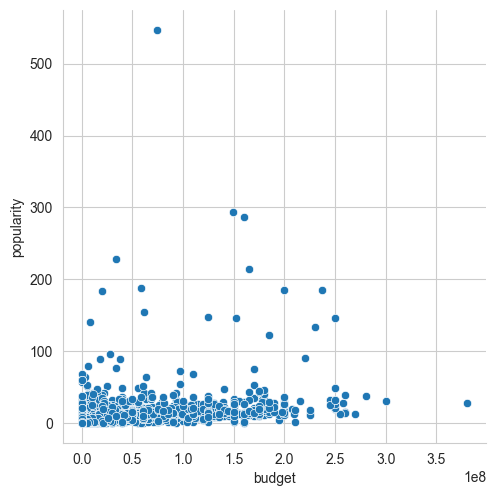

In [190]:
sns.pairplot(data=df,x_vars="budget",y_vars="popularity",size=5)

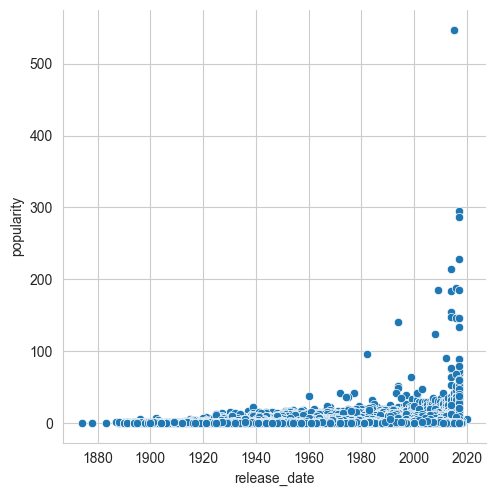

In [191]:
sns.pairplot(data=df,x_vars="release_date",y_vars="popularity",size=5)

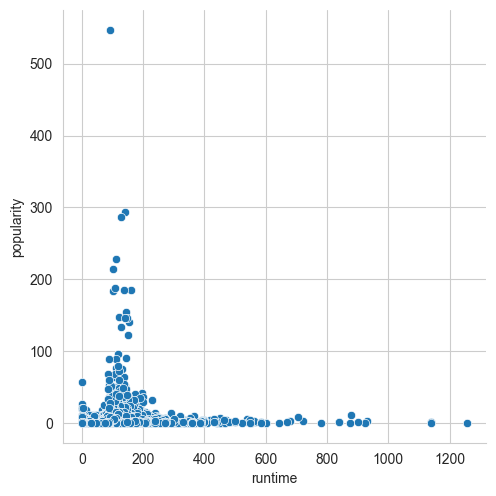

In [192]:
sns.pairplot(data=df,x_vars="runtime",y_vars="popularity",size=5)

In [193]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45539 entries, 0 to 45538
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   budget               45539 non-null  Int64         
 1   id                   45539 non-null  Int64         
 2   overview             44585 non-null  object        
 3   popularity           45539 non-null  float64       
 4   release_date         45452 non-null  datetime64[ns]
 5   revenue              45539 non-null  float64       
 6   runtime              45539 non-null  float64       
 7   tagline              20439 non-null  object        
 8   title                45536 non-null  object        
 9   video                45536 non-null  object        
 10  vote_average         45539 non-null  float64       
 11  vote_count           45536 non-null  Int64         
 12  collecion            4500 non-null   object        
 13  generos              43096 non-

In [194]:
corrdf = df[["budget","popularity","revenue","runtime","vote_average","vote_count","release_date"]]

In [195]:
corrdf.corr()["popularity"]

budget          0.449585
popularity      1.000000
revenue         0.506088
runtime         0.129872
vote_average    0.154454
vote_count      0.559886
release_date    0.123845
Name: popularity, dtype: float64